In [ ]:
import pandas as pd

#### Make a column with your bounding box list

In [43]:
df = pd.read_csv("object_detection_results-v8.csv")
df['Coordinates'] = df[['X1', 'Y1', 'X2', 'Y2']].values.tolist()

In [42]:
df_2 = pd.read_csv("object_detection_results-v8.csv")
df_2['Coordinates'] = df_2[['X1', 'Y1', 'X2', 'Y2']].values.tolist()

### This function calculates the intersection over union  (iou)

In [32]:
def calculate_intersection(box_a, box_b):
    x_left = max(box_a[0], box_b[0])
    y_top = max(box_a[1], box_b[1])
    x_right = min(box_a[2], box_b[2])
    y_bottom = min(box_a[3], box_b[3])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    return (x_right - x_left) * (y_bottom - y_top)

def calculate_iou(box_a, box_b):
    intersection = calculate_intersection(box_a, box_b)
    box_a_area = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
    box_b_area = (box_b[2] - box_b[0]) * (box_b[3] - box_b[1])
    union = box_a_area + box_b_area - intersection
    return intersection / union if union != 0 else 0

ious = [calculate_iou(box_a, box_b) for box_a, box_b in zip(df['Coordinates'], df_2['Coordinates'])]

### Visualize some of your bounding boxes to get some sense of your data

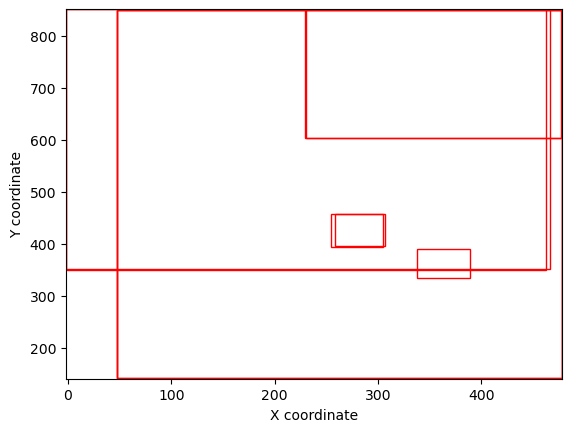

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

coordinates = df['Coordinates'][:10]

# Create a new plot
fig, ax = plt.subplots()

for coord in coordinates:
    # coord[0] is x1, coord[1] is y1, coord[2]-coord[0] is the width, and coord[3]-coord[1] is the height
    rect = patches.Rectangle((coord[0], coord[1]), coord[2]-coord[0], coord[3]-coord[1], 
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Set the limits of the plot to the min and max of the x and y coordinates
all_x_coords = [coord[0] for coord in coordinates] + [coord[2] for coord in coordinates]
all_y_coords = [coord[1] for coord in coordinates] + [coord[3] for coord in coordinates]
ax.set_xlim(min(all_x_coords), max(all_x_coords))
ax.set_ylim(min(all_y_coords), max(all_y_coords))

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


### Next steps:
* Start creating folders for specific videos
* If possible have the video in the repo (but I would ideally want to start using the other video dataset with actual bounding box truth value
* V5.csv file does not corespond to the same video as v8 right now so please create folders